# 2. Project Plan: ML Regression
 * Prepare data and do EDA
 * Use Linear Regression for predicting price
 * Understand the internal of Linear Regression
 * Evaluating the model with RMSE
 * Feature Engineering
 * Regularization

## 2.1 Preparation

In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index) # accessing the index of the series
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
df[strings] = df[strings].apply(lambda x: x.str.lower().str.replace(' ', '_'))

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.2 Exploratory Data Analysis

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [10]:
df.sample(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8714,mazda,rx-8,2011,premium_unleaded_(required),212.0,NaN,automatic,rear_wheel_drive,4.0,performance,compact,coupe,23,16,586,26795
9736,hyundai,sonata,2016,regular_unleaded,245.0,4.0,automatic,front_wheel_drive,4.0,performance,midsize,sedan,31,21,1439,34075
9436,chevrolet,silverado_1500_classic,2007,flex-fuel_(unleaded/e85),295.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,19,14,1385,27135
1520,cadillac,ats_coupe,2017,premium_unleaded_(recommended),272.0,4.0,automatic,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,31,22,1624,41395
3623,dodge,durango,2016,premium_unleaded_(recommended),360.0,8.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,4dr_suv,22,14,1851,44595


### Distribution of Price

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

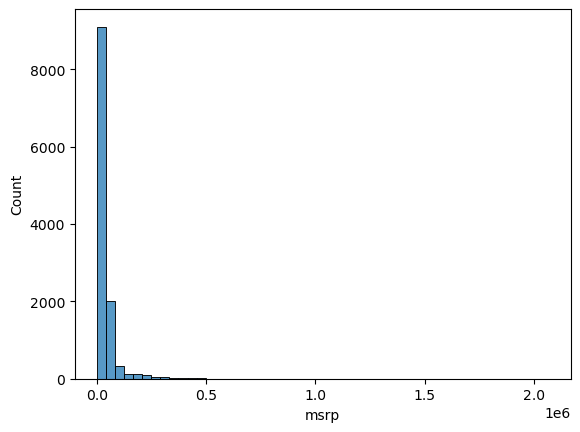

In [12]:
sns.histplot(x=df.msrp, bins=50) #long-tail distribution

<Axes: xlabel='msrp', ylabel='Count'>

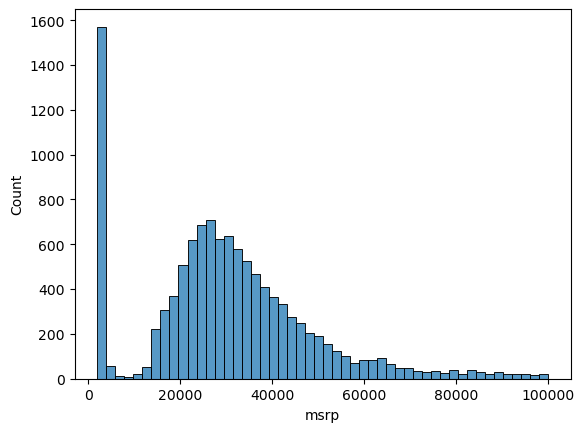

In [13]:
sns.histplot(x=df.msrp[df.msrp < 100000], bins=50)

In [14]:
# we can use log to normalize the value, np.log1p --> add 1 to all the value,  
# Not to arise zero error
price_logs = np.log1p(df.msrp)

In [15]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

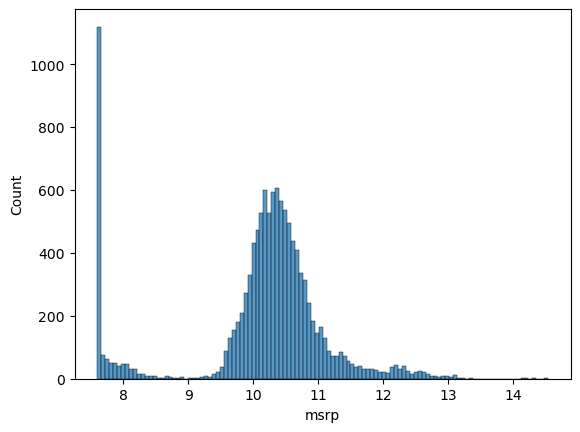

In [16]:
sns.histplot(price_logs)

In [17]:
# looks like normal distribution

### Missing Values

In [18]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.3 Setting up the validation framework

In [19]:
# let's draw it
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [20]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [21]:
# # df_train = df.iloc[n_train : ]
# # df_val = df.iloc[n_train : n_train + n_val]
# # df_test = df.iloc[n_train + n_val :]
# we have to randomly split it

In [22]:
idx = np.arange(n)

In [23]:
np.random.seed(2)
np.random.shuffle(idx)

In [24]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]


In [25]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [26]:
len(df_train), len(df_test), len(df_val)

(7150, 2382, 2382)

In [27]:
# reseting the indexes to ease the process
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [28]:
# converting the values in log scale to improve the usability
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [29]:
# deleting the not needed columns
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [30]:
len(y_train), len(y_test), len(y_val)

(7150, 2382, 2382)

## 2.4 Linear Regression

$$ g(X_i) ≈ y_i $$
$$ X_i = (X_{i1}, X_{i2}, ..... , X_{in}) $$

In [31]:
# consider an exmple
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

$$ X_i \rightarrow X_{10} = [453, 11, 86] $$

In [32]:
# take the features for i = 10;
xi = [453, 11, 86]

In [33]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [34]:
def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j]*xi[j]
        
    return pred

In [35]:
linear_regression(xi)

12.312

In [36]:
np.expm1(12.312) #exp(12.312) - 1 

222347.2221101062

$$ g(X_i) = W_0 + W_1.X_{i1} + W_2.X_{i2} + ...... + W_n.X_{in} $$
$$ W_0 \rightarrow Bias $$
$$ i.e \rightarrow X_{10} $$
$$ g(X_i) = W_0 + W_1.X_{i1} + W_2.X_{i2} + W_3.X_{i3} $$
$$ g(X_{i}) = W_0 + \sum_{j=1}^{3} W_j.X_{ij} 
$$

## 2.5 Linear Regression Vector Form

In [37]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j]*w[j]

    return res

In [38]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [39]:
w_new = [w0] + w

In [40]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [41]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [42]:
linear_regression(xi)

12.312

In [43]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [44]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [45]:
def linear_regression(X):
    return X.dot(w_new)

In [46]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.6 Training a Linear Regression Model

$$ In\ order\ to\ find\ the\ weights $$
$$ X.w = y \rightarrow w = X^{-1}.y$$
$$ unfornunately,\ X\ is\ usually\ not\ in\ square format,\\ Hence\ $$
$$ X^T.X.w = X^T.y $$
$$ X^T.X \rightarrow Gram\ Matrix, Has\ Inverse\ $$
$$ Finally $$
$$ w = I.w =  (X^T.X)^{-1}.X^T.y $$

In [47]:
def train_linear_regression(X, y):
    pass

In [48]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [49]:
# bias ---> base line
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [51]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) # Gram Matrix
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [52]:
train_linear_regression(X,y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.7 Car Price Base Line Model

In [53]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [54]:
base = ['engine_hp','engine_cylinders', 
        'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [55]:
X_train = df_train[base].values

In [56]:
X_train = df_train[base].fillna(0).values # filling the missing values with zero, ignoring the value

In [57]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [58]:
w0, w = train_linear_regression(X_train, y_train)

In [59]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

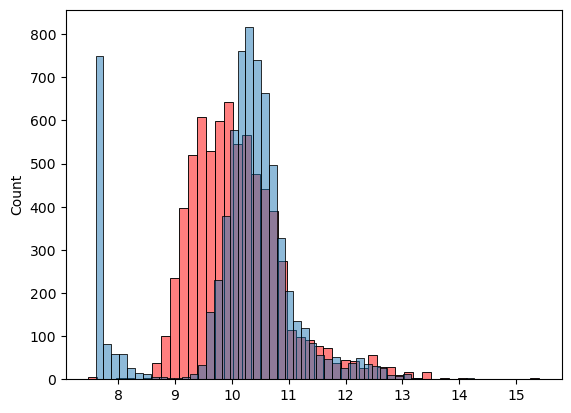

In [60]:
sns.histplot(y_pred, color='red', bins=50, alpha=0.5)
sns.histplot(y_train, bins=50, alpha=0.5)

## 2.8 RMSE (Root Mean Square Error)

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (g(X_i) - y_i)^2}
$$
$
$


In [61]:
def rmse(y, y_pred):
    error = y - y_pred
    sr = error ** 2 # square error
    mse = sr.mean() # mean square error
    return np.sqrt(mse) # root mean square error
    

In [62]:
rmse(y_train, y_pred)

0.7554192603920132

## 2.9 Validating the Model

In [63]:
base = ['engine_hp','engine_cylinders', 
        'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

In [64]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [65]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301601

In [66]:
w0

7.927257388070117

In [67]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

## 2.10 Simple Feature Engineering

In [65]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [66]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058335

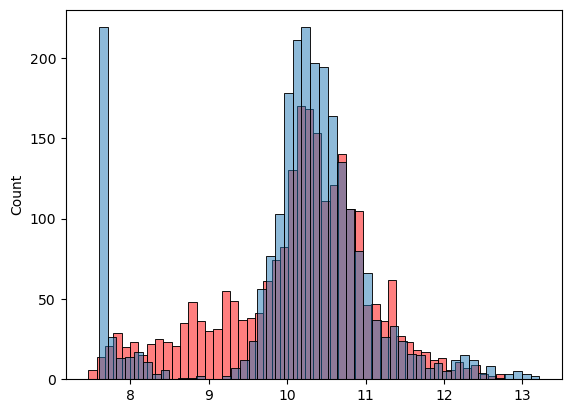

In [68]:
sns.histplot(y_pred, color='red', bins=50, alpha=0.5)
sns.histplot(y_val, bins=50, alpha=0.5)
plt.show()

## 2.11 Categorical Variables

In [69]:
for v in [2,3,4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [70]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [71]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [72]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641502353

In [73]:
# no. of doors not quite useful in this case

In [74]:
makes = list(df.make.value_counts().head().index)

In [75]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [76]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849557035

In [77]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [78]:
categorical_variables = [
    'make', 'engine_fuel_type','transmission_type', 
    'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'
]

In [79]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [80]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [81]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [82]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

56.90692826472041

## 2.12 Regularization

* Eigenvectors and eigenvalues are used to reduce noise in data. They can help us improve efficiency in computationally intensive tasks. [Kaggle]
* Adding small values to the diagonal of a matrix will little higher eigenvalues

In [83]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,50000001],
]

X = np.array(X)
X

array([[       4,        4,        4],
       [       3,        5,        5],
       [       5,        1,        1],
       [       5,        4,        4],
       [       7,        5,        5],
       [       4,        5, 50000001]])

In [84]:
y = [1,2,3,1,2,3]

In [85]:
# singular matrix problem, when there are duplicates of columns

In [86]:
XTX = X.T.dot(X) 
XTX

array([[             140,              111,        200000095],
       [             111,              108,        250000088],
       [       200000095,        250000088, 2500000100000084]])

In [87]:
XTX_inv = np.linalg.inv(XTX)

In [88]:
XTX_inv.dot(X.T).dot(y)

array([ 4.13227250e-01, -7.95624417e-02,  3.48980635e-08])

In [89]:
XTX = [
    [1,2,2],
    [2,1,1.000001],
    [2,1.0000001,1]
]

XTX = np.array(XTX)


In [90]:
np.linalg.inv(XTX)

array([[-3.33333374e-01,  6.06060625e-02,  6.06060624e-01],
       [ 6.06060624e-01, -9.09090937e+05,  9.09090634e+05],
       [ 6.06060625e-02,  9.09090906e+05, -9.09090937e+05]])

In [91]:
XTX  = XTX + 0.01 * np.eye(3)

In [92]:
np.linalg.inv(XTX)

array([[ -0.33668918,   0.33502909,   0.33499894],
       [  0.33499894,  49.91815911, -50.08733358],
       [  0.33502909, -50.0873488 ,  49.91815911]])

In [93]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) # Gram Matrix
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [94]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4708490234189506

## 2.13 Tuning the Model

In [95]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 1.1755893098228356e+16 56.90692826472041
1e-05 9.603423230785483 0.47085634731590414
0.0001 6.323432447489521 0.47085630900921793
0.001 6.28552246198999 0.4708556208168532
0.1 6.1912086741971875 0.47081309995980153
1 5.634896667768018 0.47181888777752723
10 4.2839801089709955 0.4888174228175927


In [96]:
r = 0.01
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.4708490234189506

## 2.14 Using the Model

In [97]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [98]:
X_full_train = prepare_X(df_full_train)

In [99]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [100]:
y_full_train = np.concatenate([y_train, y_val])

In [101]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [102]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.457186199355113

In [103]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [104]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [105]:
X_small = prepare_X(df_small)

In [106]:
y_pred = w0 + X_small.dot(w)
y_pred[0]

10.367598345083792

In [107]:
np.expm1(y_pred[0])

31810.983744287394

In [108]:
np.exp(y_test[20]) - 1

35000.00000000001

## 2.15 Summary
 * EDA - Looking at data, finding missing values
 * Target variable distribution - long tail --> bell shaped curve (used log transformation)
 * Validation framework: train/val/test split (helped us detect problems)
 * Normal equation: not magic, but math
 * Implemented it with numpy
 * RMSE to validate our model
 * Feature engineering: age, categorical features
 * Regularization to fight numerical instability

## 2.16 Next Steps
 * We included only 5 top features, What happens if we include 10?

Other Project:
 * Predict the price of a house - e.g boston dataset